In [7]:
import xarray as xr 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy as sp

import sys
sys.path.append('/home/users/cturrell/documents/eddy_feedback')
import functions.eddy_feedback as ef

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning, message="invalid value encountered in divide")

### Reanalysis data

In [8]:
era = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/reanalysis_data/regridded/era_TEM_3x3_ef.nc')
jra = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/reanalysis_data/regridded/jra_TEM_3x3_ef.nc')
ncep = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/reanalysis_data/regridded/ncep-ncar_TEM_3x3_ef.nc')

era_efp = ef.calculate_efp_latitude(era)
jra_efp = ef.calculate_efp_latitude(jra)
ncep_efp = ef.calculate_efp_latitude(ncep)

### PAMIP Monthly data

In [9]:
can_ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/CanESM5*.nc',
                           parallel=True, chunks={'time':12, 'ens_ax':50})
can_efp = ef.calculate_efp_lat_pamip(can_ds)
can_efp_south = ef.calculate_efp_lat_pamip(can_ds, calc_south_hemis=True)
model_can = 'CanESM5'

cesm2_ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/CESM2*.nc',
                           parallel=True, chunks={'time':12, 'ens_ax':50})
cesm2_efp = ef.calculate_efp_lat_pamip(cesm2_ds)
cesm2_efp_south = ef.calculate_efp_lat_pamip(cesm2_ds, calc_south_hemis=True)
model_cesm2 = 'CESM2'

cnrm_ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/CNRM*.nc',
                           parallel=True, chunks={'time':12, 'ens_ax':50})
cnrm_efp = ef.calculate_efp_lat_pamip(cnrm_ds)
cnrm_efp_south = ef.calculate_efp_lat_pamip(cnrm_ds, calc_south_hemis=True)
model_cnrm='CNRM-CM6-1'

e3sm_ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/E3SMv1_ua_epfy_divF_r200_3x3.nc')
e3sm_efp = ef.calculate_efp_lat_pamip(e3sm_ds, usual_mean=False)
e3sm_efp_south = ef.calculate_efp_lat_pamip(e3sm_ds, calc_south_hemis=True, usual_mean=False)
model_e3sm = 'E3SMv1'

ecearth_ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/EC-EARTH3*.nc',
                           parallel=True, chunks={'time':12, 'ens_ax':50})
ecearth_efp = ef.calculate_efp_lat_pamip(ecearth_ds)
ecearth_efp_south = ef.calculate_efp_lat_pamip(ecearth_ds, calc_south_hemis=True)
model_ecearth = 'EC-EARTH3'

# skip AWI

fgoals_ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/FGOALS-f3-L*.nc',
                           parallel=True, chunks={'time':12, 'ens_ax':50})
fgoals_efp = ef.calculate_efp_lat_pamip(fgoals_ds)
fgoals_efp_south = ef.calculate_efp_lat_pamip(fgoals_ds, calc_south_hemis=True)
model_fgoals = 'FGOALS-f3-L'

hadll_ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/HadGEM3-GC31-LL*.nc',
                           parallel=True, chunks={'time':12, 'ens_ax':50})
hadll_efp = ef.calculate_efp_lat_pamip(hadll_ds)
hadll_efp_south = ef.calculate_efp_lat_pamip(hadll_ds, calc_south_hemis=True)
model_hadll = 'HadGEM3-GC31-LL'


hadmm_ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/HadGEM3-GC31-MM*.nc',
                           parallel=True, chunks={'time':12, 'ens_ax':50})
hadmm_efp = ef.calculate_efp_lat_pamip(hadmm_ds)
hadmm_efp_south = ef.calculate_efp_lat_pamip(hadmm_ds, calc_south_hemis=True)
model_hadmm = 'HadGEM3-GC31-MM'

ipsl_ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/IPSL-CM6A-LR_ua_epfy_divF_r200_3x3.nc',
                            parallel=True, chunks={'time':12, 'ens_ax':50})
ipsl_efp = ef.calculate_efp_lat_pamip(ipsl_ds)
ipsl_efp_south = ef.calculate_efp_lat_pamip(ipsl_ds, calc_south_hemis=True)
model_ipsl = 'IPSL-CM6A-LR'

miroc_ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/MIROC6*.nc',
                           parallel=True, chunks={'time':12, 'ens_ax':50})
miroc_efp = ef.calculate_efp_lat_pamip(miroc_ds)
miroc_efp_south = ef.calculate_efp_lat_pamip(miroc_ds, calc_south_hemis=True)
model_miroc = 'MIROC6'

nor_ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/NorESM2-LM*.nc',
                           parallel=True, chunks={'time':12, 'ens_ax':50})
nor_efp = ef.calculate_efp_lat_pamip(nor_ds)
nor_efp_south = ef.calculate_efp_lat_pamip(nor_ds, calc_south_hemis=True)
model_nor = 'NorESM2-LM'

t159_ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/OpenIFS-159*.nc',
                           parallel=True, chunks={'time':12, 'ens_ax':50})
t159_efp = ef.calculate_efp_lat_pamip(t159_ds)
t159_efp_south = ef.calculate_efp_lat_pamip(t159_ds, calc_south_hemis=True)
model_t159 = 'OpenIFS-159'

t511_ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/OpenIFS-511*.nc',
                           parallel=True, chunks={'time':12, 'ens_ax':50})
t511_efp = ef.calculate_efp_lat_pamip(t511_ds)
t511_efp_south = ef.calculate_efp_lat_pamip(t511_ds, calc_south_hemis=True)
model_t511 = 'OpenIFS-511'

cesm1_ds = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/processed_monthly/CESM1*.nc')
cesm1_efp = ef.calculate_efp_lat_pamip(cesm1_ds, usual_mean=False)
cesm1_efp_south = ef.calculate_efp_lat_pamip(cesm1_ds, calc_south_hemis=True, usual_mean=False)
model_cesm1 = 'CESM1-WACCM-SC'

# Figure 6b

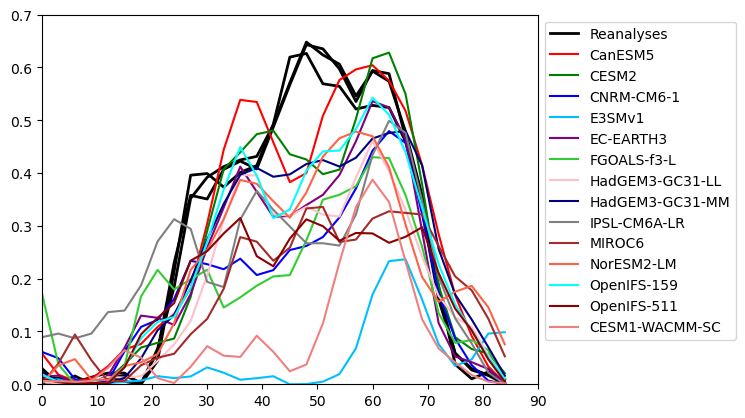

In [25]:
plt.figure()

# plot reanalysis data
plt.plot(era_efp.lat.values, era_efp, color='k', linewidth=2, label='Reanalyses')
plt.plot(jra_efp.lat.values, jra_efp, color='k', linewidth=2)
plt.plot(ncep_efp.lat.values, ncep_efp, color='k', linewidth=2)

#plot PAMIP data
plt.plot(can_efp.lat.values, can_efp, color='red', label='CanESM5')
plt.plot(cesm2_efp.lat.values, cesm2_efp, color='green', label='CESM2')
plt.plot(cnrm_efp.lat.values, cnrm_efp, color='blue', label='CNRM-CM6-1')
plt.plot(e3sm_efp.lat.values, e3sm_efp, color='deepskyblue', label='E3SMv1')
plt.plot(ecearth_efp.lat.values, ecearth_efp, color='purple', label='EC-EARTH3')
plt.plot(fgoals_efp.lat.values, fgoals_efp, color='limegreen', label='FGOALS-f3-L')
plt.plot(hadll_efp.lat.values, hadll_efp, color='pink', label='HadGEM3-GC31-LL')
plt.plot(hadmm_efp.lat.values, hadmm_efp, color='navy', label='HadGEM3-GC31-MM')
plt.plot(ipsl_efp.lat.values, ipsl_efp, color='gray', label='IPSL-CM6A-LR')
plt.plot(miroc_efp.lat.values, miroc_efp, color='brown', label='MIROC6')
plt.plot(nor_efp.lat.values, nor_efp, color='tomato', label='NorESM2-LM')
plt.plot(t159_efp.lat.values, t159_efp, color='cyan', label='OpenIFS-159')
plt.plot(t511_efp.lat.values, t511_efp, color='darkred', label='OpenIFS-511')
plt.plot(cesm1_efp.lat.values, cesm1_efp, color='lightcoral', label='CESM1-WACMM-SC')


plt.xlim([0,90])
plt.ylim([0,0.7])
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [11]:
cnrm_efp

<xarray.DataArray (lat: 31)>
dask.array<pow, shape=(31,), dtype=float64, chunksize=(31,), chunktype=numpy.ndarray>
Coordinates:
    lon      float64 0.0
  * lat      (lat) int64 0 3 6 9 12 15 18 21 24 ... 66 69 72 75 78 81 84 87 90

In [18]:
mean = (can_efp + cesm2_efp + cnrm_efp + e3sm_efp + ecearth_efp + \
        fgoals_efp + hadll_efp + hadmm_efp + ipsl_efp + miroc_efp + \
        nor_efp + t159_efp + t511_efp + cesm1_efp) / 14
mean

<xarray.DataArray (lat: 31)>
dask.array<truediv, shape=(31,), dtype=float64, chunksize=(31,), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) int64 0 3 6 9 12 15 18 21 24 ... 66 69 72 75 78 81 84 87 90
    lon      float64 0.0

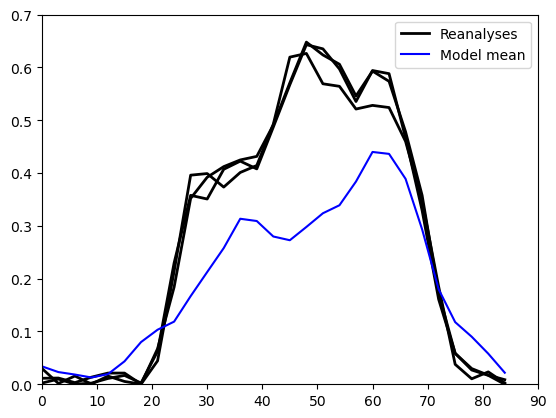

In [19]:
plt.figure()

# plot reanalysis data
plt.plot(era_efp.lat.values, era_efp, color='k', linewidth=2, label='Reanalyses')
plt.plot(jra_efp.lat.values, jra_efp, color='k', linewidth=2)
plt.plot(ncep_efp.lat.values, ncep_efp, color='k', linewidth=2)

#plot PAMIP data
plt.plot(mean.lat.values, mean, color='blue', label='Model mean')

plt.xlim([0,90])
plt.ylim([0,0.7])
plt.legend(bbox_to_anchor=(1,1))
plt.show()